### Analysis of Second Order Action

The purpose of this notebook is to analyze and construct the second-order action, combining the relevant g and f
parts while making simplifying assumptions to recover the final structure.

In [1]:
import sympy

sympy.init_printing()

In [2]:
syms = sympy.symbols("r psi theta phi")
r, psi, theta, phi = syms

In [3]:
L = sympy.symbols("L")  # AdS length scale
r_0 = sympy.symbols("r_0")

In [4]:
# spherical part of the metric
g = sympy.Function('g')(r)
dg = sympy.diff(g, r)
ddg = sympy.diff(dg, r)

# solution
g_sol = r ** 2 + r_0 ** 2
dg_sol = sympy.diff(g_sol, r)
ddg_sol = sympy.diff(dg_sol, r)

In [5]:
# radial part of the metric
f = sympy.Function('f')(r)
df = sympy.diff(f, r)

# solution
f_sol = (L ** 2 + r ** 2 + 2 * r_0 ** 2) / L ** 2
df_sol = sympy.diff(f_sol, r)

In [6]:
# gauge field
Phi = sympy.Function('Phi')(r)
dPhi = sympy.diff(Phi, r)
ddPhi = sympy.diff(dPhi, r)

The Lagrangian is given by the following.

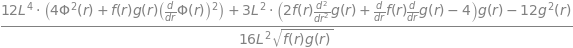

In [7]:
lagrangian = 3 * (4 * L ** 4 * (4 * Phi ** 2 + f * g * dPhi ** 2) + L ** 2 * g * (2 * f * ddg + df * dg - 4) - 4 * g ** 2) / (16 * L ** 2 * sympy.sqrt(f * g))
lagrangian

In [8]:
delta_f = sympy.Function('delta_f')(r)
ddelta_f = sympy.diff(delta_f, r)

In [9]:
delta_g = sympy.Function('delta_g')(r)
ddelta_g = sympy.diff(delta_g, r)
dddelta_g = sympy.diff(ddelta_g, r)

In [10]:
delta_Phi = sympy.Function('delta_Phi')(r)
ddelta_Phi = sympy.diff(delta_Phi, r)

Compute the Phi and g part of the action.

In [11]:
# make sure to divide appropriate terms by two so it doesn't interfere with integration by parts later
ddS_gg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), g)) / 2
ddS_phiphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, Phi), Phi)) / 2
ddS_dphidphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, dPhi), dPhi)) / 2
ddS_gphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), Phi))
ddS_gdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), dg))
ddS_gdphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), dPhi))
ddS_phidg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, phi), dg))
ddS_phidphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, Phi), dPhi))
ddS_dgdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, dg), dg)) / 2
ddS_dgdphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, dg), dPhi))
ddS_gddg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, g), ddg))  # involves second derivative

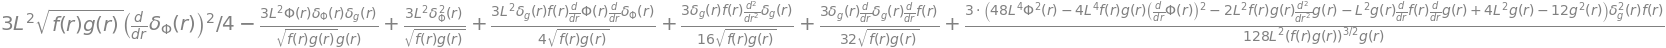

In [12]:
action_Phi_g = ( 
    delta_g ** 2 * ddS_gg +
    delta_Phi ** 2 * ddS_phiphi +
    ddelta_Phi ** 2 * ddS_dphidphi +
    delta_g * delta_Phi * ddS_gphi +
    delta_g * ddelta_g * ddS_gdg +
    delta_g * ddelta_Phi * ddS_gdphi +
    delta_Phi * ddelta_g * ddS_phidg +
    delta_Phi * ddelta_Phi * ddS_phidphi +
    ddelta_g ** 2 * ddS_dgdg +
    ddelta_g * ddelta_Phi * ddS_dgdphi +
    delta_g * dddelta_g * ddS_gddg
)
action_Phi_g

On integration by parts, the dgdg'' term will contribute terms with dg'dg' and dg'dg:

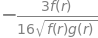

In [13]:
ddS_dgdg -= ddS_gddg
ddS_dgdg

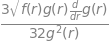

In [14]:
ddS_gdg = sympy.simplify(ddS_gdg - sympy.diff(ddS_gddg, r))
ddS_gdg

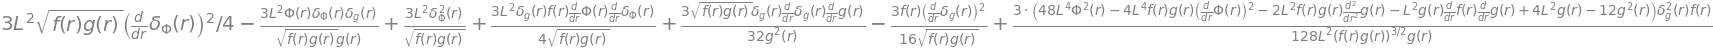

In [15]:
action_Phi_g = ( 
    delta_g ** 2 * ddS_gg +
    delta_Phi ** 2 * ddS_phiphi +
    ddelta_Phi ** 2 * ddS_dphidphi +
    delta_g * delta_Phi * ddS_gphi +
    delta_g * ddelta_g * ddS_gdg +
    delta_g * ddelta_Phi * ddS_gdphi +
    delta_Phi * ddelta_g * ddS_phidg +
    delta_Phi * ddelta_Phi * ddS_phidphi +
    ddelta_g ** 2 * ddS_dgdg +
    ddelta_g * ddelta_Phi * ddS_dgdphi
)
action_Phi_g

Introduce q.

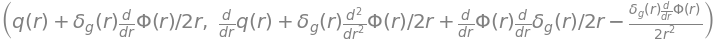

In [16]:
q = sympy.Function('q')(r)
dq = sympy.diff(q, r)
dphi = q + dPhi * delta_g / (2 * r)
dphidr = sympy.diff(dphi, r)
dphi, dphidr

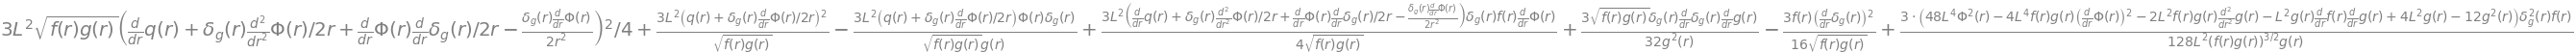

In [17]:
action_q = action_Phi_g.subs({delta_Phi: dphi, ddelta_Phi: dphidr})
action_q

The expansion of the action involving df consists of the following terms.

In [18]:
ddS_ff = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), f)) / 2
ddS_fg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), g))
ddS_fphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), Phi))
ddS_fdf = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), df))
ddS_fdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), dg))
ddS_fdphi = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), dPhi))
ddS_dfg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, df), g))
ddS_dfdg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, df), dg))
ddS_fddg = sympy.simplify(sympy.diff(sympy.diff(lagrangian, f), ddg))  # involves second derivative

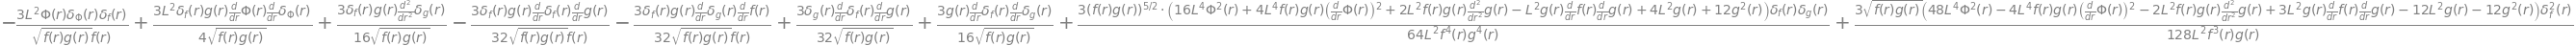

In [19]:
action_f = (
    delta_f ** 2 * ddS_ff +
    delta_f * delta_g * ddS_fg +
    delta_f * delta_Phi * ddS_fphi +
    delta_f * ddelta_f * ddS_fdf +
    delta_f * ddelta_g * ddS_fdg +
    delta_f * ddelta_Phi * ddS_fdphi +
    ddelta_f * delta_g * ddS_dfg +
    ddelta_f * ddelta_g * ddS_dfdg +
    delta_f * dddelta_g * ddS_fddg
)
action_f

Use integration by parts on the dfdf' term:

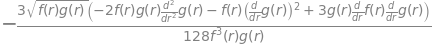

In [20]:
ddS_ff_2 = -sympy.simplify(sympy.diff(ddS_fdf, r)) / 2
ddS_ff_2

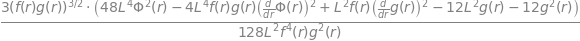

In [21]:
ddS_ff = sympy.simplify(ddS_ff + ddS_ff_2)
ddS_ff

This can be simplified to the following using Equation 4.17:

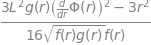

In [22]:
ddS_ff = 3 * (L ** 2 * g * dPhi ** 2 - r ** 2) / (16 * f * sympy.sqrt(f * g))
ddS_ff

On integration by parts, the dfdg'' term produces terms with df'dg' and dfdg':

In [23]:
ddS_dfdg -= ddS_fddg
ddS_dfdg

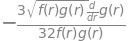

In [24]:
ddS_fdg = sympy.simplify(ddS_fdg - sympy.diff(ddS_fddg, r))
ddS_fdg

You can produce an action totally algebraic in df by integrating the df'dg term by parts, producing terms with dfdg' and dfdg:

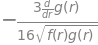

In [25]:
ddS_fdg = sympy.simplify(ddS_fdg - ddS_dfg)
ddS_fdg

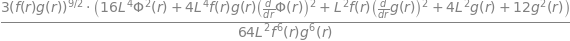

In [26]:
ddS_fg = sympy.simplify(ddS_fg - sympy.diff(ddS_dfg, r))
ddS_fg

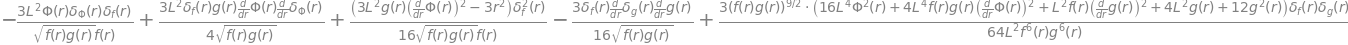

In [27]:
action_f = (
    delta_f ** 2 * ddS_ff +
    delta_f * delta_g * ddS_fg +
    delta_f * delta_Phi * ddS_fphi +
    delta_f * ddelta_g * ddS_fdg +
    delta_f * ddelta_Phi * ddS_fdphi +
    ddelta_f * ddelta_g * ddS_dfdg
)
action_f

### Quadratic Action when dg = 0

In this case, q = delta_Phi. Setting delta_g and its derivative to zero, you get:

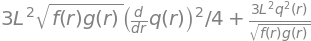

In [28]:
action_q_dg_0 = action_q.subs({delta_g: 0, ddelta_g: 0})
action_q_dg_0

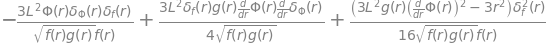

In [29]:
action_f_dg_0 = action_f.subs({delta_g: 0, ddelta_g: 0})
action_f_dg_0

Check the sign of the quadratic factor.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import ellipkinc

In [31]:
def a_b_params(phi_star):
    """Get elliptic integral parameters."""
    a = (1 + 16 * phi_star ** 2) ** (1./4)
    b = np.sqrt((a ** 2 - 1) / 2)
    return a, b

In [32]:
def phi_of_r(r_val, phi_star, L_val):
    """Get gauge field."""
    a, b = a_b_params(phi_star)
    phi = np.arctan2(r_val, L_val * a)
    m = 1 - a ** 2 / b ** 2
    return phi_star * np.cosh((2 / b) * ellipkinc(phi, m))

In [33]:
def dphi_of_r(r_val, phi_star, L_val):
    """Get radial derivative of gauge field."""
    a, b = a_b_params(phi_star)
    phi = np.arctan(r_val / (L_val * a))
    m = 1 - a ** 2 / b ** 2
    denom = np.sqrt((L_val * a * b) ** 2 + (a ** 2 + b ** 2) * r_val ** 2 + r_val ** 4 / L_val ** 2)
    return phi_star * np.sinh((2 / b) * ellipkinc(phi, m)) * 2 / denom

In [34]:
def ddphi_of_r(r_val, phi_star, L_val):
    """Get second derivative of gauge field."""
    a, b = a_b_params(phi_star)
    phi = np.arctan2(r_val, (L_val * a))
    m = 1 - a ** 2 / b ** 2
    sin_part = np.sinh((2 / b) * ellipkinc(phi, m))
    cos_part = np.cosh((2 / b) * ellipkinc(phi, m))

    first_term = 2 * L_val * (a ** 2 * L_val ** 2 + r_val ** 2) ** 2 * cos_part / (b ** 2 * L_val ** 2 + r_val ** 2)

    fac1 = a ** 2 * L_val ** 2 + b ** 2 * L_val ** 2 + 2 * r_val ** 2
    fac2 = a ** 2 * (b ** 2 * L_val ** 2 + r_val ** 2) / (b ** 2 * (a ** 2 * L_val ** 2 + r_val ** 2))
    second_term = a ** 3 * r_val * fac1 * sin_part / (b ** 3 * fac2 ** (3. / 2))

    return 2 * L_val * phi_star * (first_term - second_term) / (a ** 2 * L_val ** 2 + r_val ** 2) ** 3

In [35]:
def f_of_r(r_val, L_val, r_0_val):
    return (L_val ** 2 + r_val ** 2 + 2 * r_0_val ** 2) / L_val ** 2

def g_of_r(r_val, r_0_val):
    return r_val ** 2 + r_0_val ** 2

def dg_of_r(r_val):
    return 2 * r_val

In [36]:
def ddf_factor(r_val, phi_star, L_val, r_0_val):
    phi_val = phi_of_r(r_val, phi_star, L_val)
    dphi_val = dphi_of_r(r_val, phi_star, L_val)
    f_val = f_of_r(r_val, L_val, r_0_val)
    g_val = g_of_r(r_val, r_0_val)
    dg_val = dg_of_r(r_val)

    return (
        48 * L_val ** 4 * phi_val ** 2 -
        4 * L_val ** 4 * f_val * g_val * dphi_val ** 2 +
        L_val ** 2 * f_val * dg_val ** 2 -
        12 * L_val ** 2 * g_val -
        12 * g_val ** 2
    )

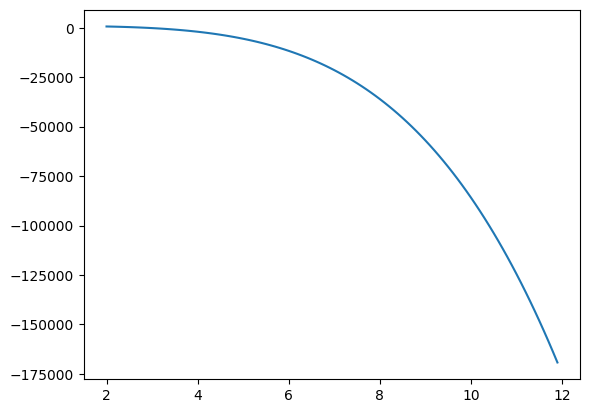

In [37]:
L_val = 1
r_0_val = 2  # has to be greater than 1.25 * L
phi_star = 5  # has to be greater than 3.56

r_vals = np.arange(r_0_val, r_0_val + 10, 0.1)
dfs = [ddf_factor(r_val, phi_star, L_val, r_0_val) for r_val in r_vals]
plt.plot(r_vals, dfs);

It doesn't have to be negative, but in general, it is.

#### Completing the Square

The goal is to write

A * delta_f^2 + B * delta_f * delta_Phi + C * delta_f * ddelta_Phi

in the form

-(a_1 * delta_f + a_2 * delta_Phi + a_3 * ddelta_Phi)^2 + c_0

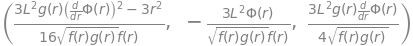

In [38]:
A = ddS_ff
B = ddS_fphi
C = ddS_fdphi
A, B, C

The solution is:

In [39]:
a_1 = sympy.sqrt(-A)
a_2 = -B / (2 * a_1)
a_3 = -C / (2 * a_1)

# get additional terms
term_qq = sympy.simplify(-B ** 2 / (4 * A))
term_qdq = sympy.simplify(-B * C / (2 * A))
term_dqdq = sympy.simplify(-C ** 2 / (4 * A))
c_0 = term_qq * delta_Phi ** 2 + term_qdq * delta_Phi * ddelta_Phi + term_dqdq * ddelta_Phi ** 2

# final completion
completed_square = -(a_1 * delta_f + a_2 * delta_Phi + a_3 * ddelta_Phi) ** 2 + c_0

Check the solution.

In [40]:
r_val = 10

func_subs = {
    L: L_val,
    r: r_val,
    f: f_of_r(r_val, L_val, r_0_val),
    g: g_of_r(r_val, r_0_val),
    dg: dg_of_r(r_val),
    Phi: phi_of_r(r_val, phi_star, L_val),
    dPhi: dphi_of_r(r_val, phi_star, L_val),
}

In [41]:
action_f_dg_0.subs(func_subs)

                                                                        2     
-0.000308482418675081⋅√26⋅δ_Φ(10)⋅δ_f(10) - 0.000315647308374014⋅√26⋅δ_f (10) 
                                                                              

                                  ⎛d         ⎞│    
+ 0.00869155372969218⋅√26⋅δ_f(10)⋅⎜──(δ_Φ(r))⎟│    
                                  ⎝dr        ⎠│r=10

In [42]:
sympy.simplify(sympy.expand(completed_square.subs(func_subs)))

    ⎛                                                                         
    ⎜                        2                                                
√26⋅⎜4.06575814682064e-20⋅δ_Φ (10) - 0.000308482418675081⋅δ_Φ(10)⋅δ_f(10) - 1.
    ⎝                                                                         

                                                                              
                           ⎛d         ⎞│                               2      
73472347597681e-18⋅δ_Φ(10)⋅⎜──(δ_Φ(r))⎟│     - 0.000315647308374014⋅δ_f (10) +
                           ⎝dr        ⎠│r=10                                  

                                                                              
                             ⎛d         ⎞│                            ⎛d      
 0.00869155372969218⋅δ_f(10)⋅⎜──(δ_Φ(r))⎟│     + 6.93889390390723e-18⋅⎜──(δ_Φ(
                             ⎝dr        ⎠│r=10                        ⎝dr     

         2⎞
   ⎞│     ⎟
r))⎟│     ⎟
   ⎠│r=10 ⎠

There is indeed agreement. The final Lagrangian is:

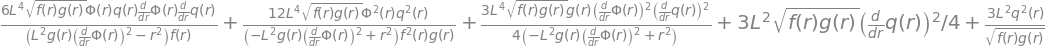

In [43]:
final_lagrangian_no_g = action_q_dg_0 + c_0.subs({delta_Phi: q, ddelta_Phi: dq})
final_lagrangian_no_g

#### q'^2 Term

The factor multiplying the q'^2 term is:

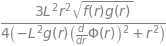

In [44]:
term_dqdq = sympy.simplify(3 * L ** 2 * sympy.sqrt(f * g) / 4 + term_dqdq)
term_dqdq

After being multipled by a factor of 8, it agrees with the paper.

#### q^2 Term

To get the factor multiplying the q^2 term, you need to integrate the term with dqdq' by parts:

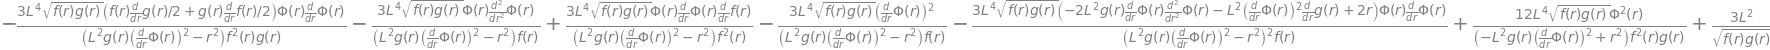

In [45]:
term_qq = 3 * L ** 2 / sympy.sqrt(f * g) + term_qq - sympy.diff(term_qdq, r) / 2
term_qq

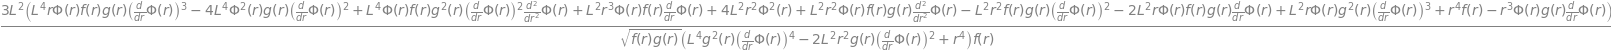

In [46]:
term_qq = term_qq.subs({df: df_sol, dg: dg_sol, ddg: ddg_sol})
term_qq = sympy.simplify(sympy.expand(term_qq.simplify()))
term_qq

In the paper, you have:

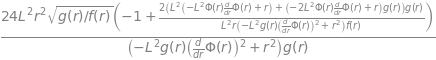

In [47]:
K = 6 * L ** 2 * r ** 2 / (r ** 2 - g * L ** 2 * dPhi ** 2)
V1 = (L ** 2 * (r - L ** 2 * Phi * dPhi) + g * (r - 2 * L ** 2 * Phi * dPhi)) / (r ** 2 - g * L ** 2 * dPhi ** 2)
V2 = V1 * 2 * g / (L ** 2 * f * r) - 1
V = (4 * K * V2 / g) * sympy.sqrt(g / f)
V

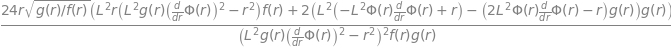

In [48]:
V = V.simplify()
V

You can compare the results numerically.

In [49]:
r_0_val = 1
L_val = 2

def get_term_qq(r_val):
    """Get factor of q^2 term from these calculations and in paper for given r."""
    func_subs = {
        L: L_val,
        r: r_val,
        f: f_of_r(r_val, L_val, r_0_val),
        g: g_of_r(r_val, r_0_val),
        dg: dg_of_r(r_val),
        Phi: phi_of_r(r_val, phi_star, L_val),
        dPhi: dphi_of_r(r_val, phi_star, L_val),
        ddPhi: ddphi_of_r(r_val, phi_star, L_val)
    }
    return 8 * term_qq.subs(func_subs), V.subs(func_subs)

In [50]:
r_vals = np.arange(100, 1000, 10)
vals_qq = [get_term_qq(r_val) for r_val in r_vals]
val1_qq, val2_qq = zip(*vals_qq)

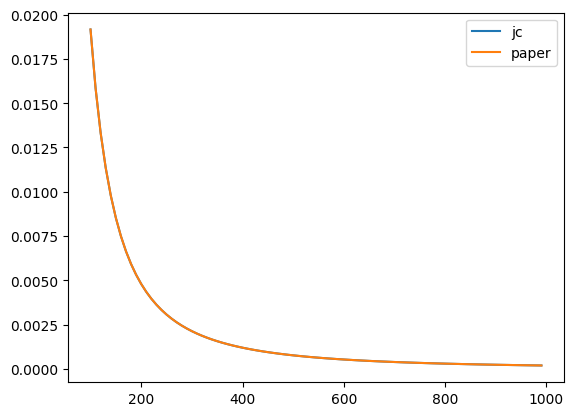

In [51]:
plt.plot(r_vals, val1_qq, label='jc')
plt.plot(r_vals, val2_qq, label='paper')
plt.legend();

### Quadratic Action when Phi = 0

In this case, there is no source.

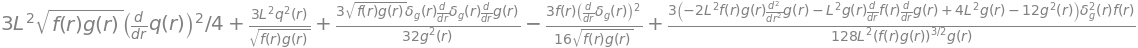

In [52]:
action_q_phi_0 = action_q.subs({Phi: 0, dPhi: 0, ddPhi: 0})
action_q_phi_0

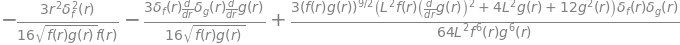

In [53]:
action_f_phi_0 = action_f.subs({Phi: 0, dPhi: 0})
action_f_phi_0

Completing the square produces:

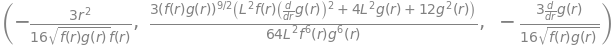

In [54]:
A2 = ddS_ff.subs({Phi: 0, dPhi: 0})
B2 = ddS_fg.subs({Phi: 0, dPhi: 0})
C2 = ddS_fdg.subs({Phi: 0, dPhi: 0})
A2, B2, C2

In [55]:
a_1_2 = sympy.sqrt(-A2)
a_2_2 = -B2 / (2 * a_1_2)
a_3_2 = -C2 / (2 * a_1_2)
c_0_2 = -B2 ** 2 * delta_g ** 2 / (4 * A2) - B2 * C2 * delta_g * ddelta_g / (2 * A2) - C2 ** 2 * ddelta_g ** 2 / (4 * A2)

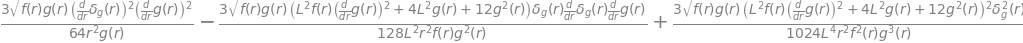

In [56]:
c_0_2

The final Lagrangian is:

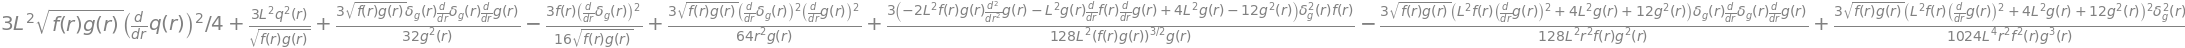

In [57]:
final_lagrangian_no_phi = action_q_phi_0 + c_0_2
final_lagrangian_no_phi

Collecting just the g related terms:

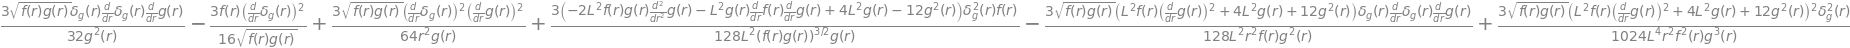

In [58]:
g_terms = action_q_phi_0 + c_0_2 - 3 * L ** 2 * sympy.sqrt(f * g) * dq ** 2 / 4 - 3 * L ** 2 * q ** 2 / sympy.sqrt(f * g)
g_terms

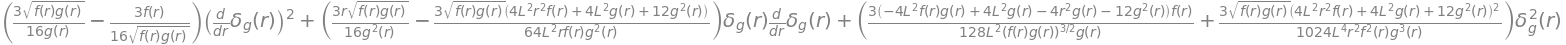

In [59]:
g_terms = sympy.collect(g_terms.subs({dg: dg_sol, ddg: ddg_sol, df: df_sol}), [delta_g, ddelta_g, ddelta_g * delta_g])
g_terms

The dgdg term is:

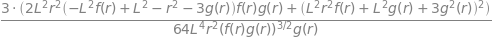

In [60]:
term_gg = g_terms.coeff(delta_g * delta_g).simplify()
term_gg

The dgdg' term has to be integrated by parts:

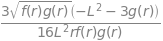

In [61]:
term_gdg = g_terms.coeff(delta_g * ddelta_g).simplify()
term_gdg

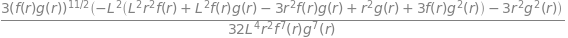

In [62]:
extra_term_gg = (-sympy.diff(term_gdg, r) / 2).simplify()
extra_term_gg = extra_term_gg.subs({dg: dg_sol, df: df_sol}).simplify()
extra_term_gg

When you add it back, you get in the numerator:

In [63]:
n, _ = sympy.fraction((term_gg + extra_term_gg).simplify())
n

which simplifies to:

In [64]:
n.subs({f: f_sol, g: g_sol}).simplify()

Using the Phi = 0 assumption, this simplifies to zero, as expected.

#### q'^2 Term

In the paper, the factor in front of q'^2 is:

In [65]:
factor_dq_square = sympy.sqrt(f * g) * 6 * L ** 2
factor_dq_square

which agrees with the one here up to a factor of 8.

#### q^2 Term

The factor in front of q^2 in the paper is:

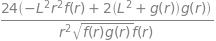

In [66]:
factor_q_square = sympy.simplify((1 / sympy.sqrt(f * g)) * 24 * L ** 2 * ((2 * g * (L ** 2 + g) / (r ** 2 * L ** 2 * f)) - 1))
factor_q_square

The numerator is:

In [67]:
n, d = sympy.fraction(factor_q_square)
sympy.simplify(n.subs({f: f_sol, g: g_sol}))

Equation 4.17 reduces to C = 0 when Phi = 0. This means L^2 * r_0^2 + r_0^4 = 0. Thus, the numerator becomes:

In [68]:
n = 24 * L ** 2 * r ** 2 * f
n

and the final result is:

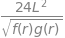

In [69]:
n / d

which again agrees with the one here.